<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,49.936008,-25.561244,34.374764,64.778369,-30.403604
1,0.0,1.0,35.311394,23.404246,68.715641,54.592891,14.122750
2,0.0,2.0,30.241936,-43.747753,-3.505817,51.062209,-54.568026
3,0.0,3.0,38.989203,-31.146514,17.842689,57.154342,-39.311653
4,0.0,4.0,63.572856,51.992861,125.565717,74.275906,51.289811
...,...,...,...,...,...,...,...
119995,999.0,115.0,42.826297,16.368268,69.194566,50.171661,19.022905
119996,999.0,116.0,45.217248,1.438681,56.655929,53.545270,3.110659
119997,999.0,117.0,99.625908,129.359118,238.985026,130.315396,108.669630
119998,999.0,118.0,86.638606,78.183394,174.822000,111.990430,62.831569


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    49.936008  -25.561244   34.374764   64.778369  -30.403604
      1.0    35.311394   23.404246   68.715641   54.592891   14.122750
      2.0    30.241936  -43.747753   -3.505817   51.062209  -54.568026
      3.0    38.989203  -31.146514   17.842689   57.154342  -39.311653
      4.0    63.572856   51.992861  125.565717   74.275906   51.289811
...                ...         ...         ...         ...         ...
999.0 115.0  42.826297   16.368268   69.194566   50.171661   19.022905
      116.0  45.217248    1.438681   56.655929   53.545270    3.110659
      117.0  99.625908  129.359118  238.985026  130.315396  108.669630
      118.0  86.638606   78.183394  174.822000  111.990430   62.831569
      119.0  89.202181   84.739424  183.941605  115.607611   68.333994

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    49.936008  -25.561244   34.374764   64.778369  -30.403604
      1.0    35.311394   23.404246   68.715641   54.592891   14.122750
      2.0    30.241936  -43.747753   -3.505817   51.062209  -54.568026
      3.0    38.989203  -31.146514   17.842689   57.154342  -39.311653
      4.0    63.572856   51.992861  125.565717   74.275906   51.289811
...                ...         ...         ...         ...         ...
999.0 115.0  42.826297   16.368268   69.194566   50.171661   19.022905
      116.0  45.217248    1.438681   56.655929   53.545270    3.110659
      117.0  99.625908  129.359118  238.985026  130.315396  108.669630
      118.0  86.638606   78.183394  174.822000  111.990430   62.831569
      119.0  89.202181   84.739424  183.941605  115.607611   68.333994

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,49.936008,-25.561244,34.374764,64.778369,-30.403604
1,0.0,1.0,35.311394,23.404246,68.715641,54.592891,14.122750
2,0.0,2.0,30.241936,-43.747753,-3.505817,51.062209,-54.568026
3,0.0,3.0,38.989203,-31.146514,17.842689,57.154342,-39.311653
4,0.0,4.0,63.572856,51.992861,125.565717,74.275906,51.289811
...,...,...,...,...,...,...,...
119995,999.0,115.0,42.826297,16.368268,69.194566,50.171661,19.022905
119996,999.0,116.0,45.217248,1.438681,56.655929,53.545270,3.110659
119997,999.0,117.0,99.625908,129.359118,238.985026,130.315396,108.669630
119998,999.0,118.0,86.638606,78.183394,174.822000,111.990430,62.831569


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    49.936008  -25.561244   34.374764   64.778369  -30.403604
      1.0    35.311394   23.404246   68.715641   54.592891   14.122750
      2.0    30.241936  -43.747753   -3.505817   51.062209  -54.568026
      3.0    38.989203  -31.146514   17.842689   57.154342  -39.311653
      4.0    63.572856   51.992861  125.565717   74.275906   51.289811
...                ...         ...         ...         ...         ...
999.0 115.0  42.826297   16.368268   69.194566   50.171661   19.022905
      116.0  45.217248    1.438681   56.655929   53.545270    3.110659
      117.0  99.625908  129.359118  238.985026  130.315396  108.669630
      118.0  86.638606   78.183394  174.822000  111.990430   62.831569
      119.0  89.202181   84.739424  183.941605  115.607611   68.333994

[120000 rows x 5 columns]

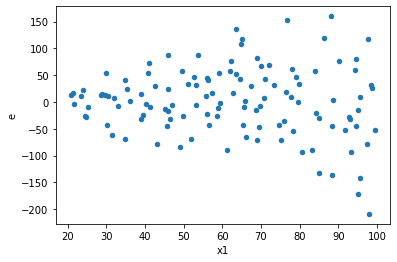

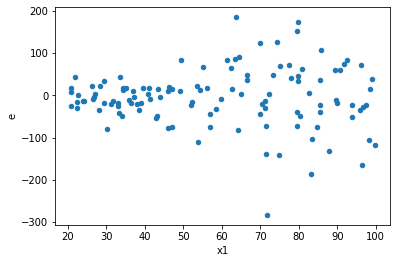

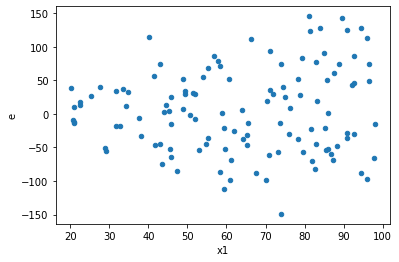

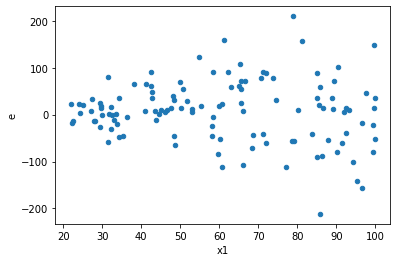

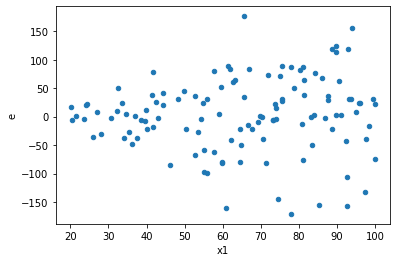

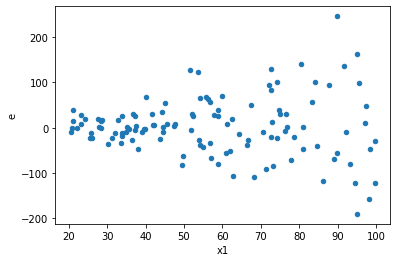

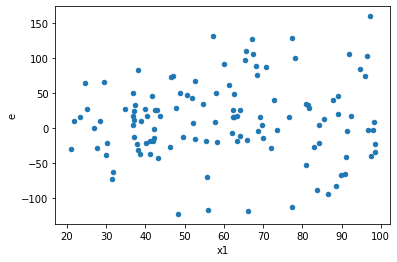

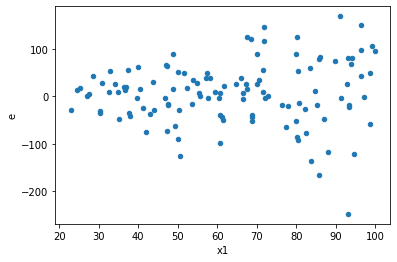

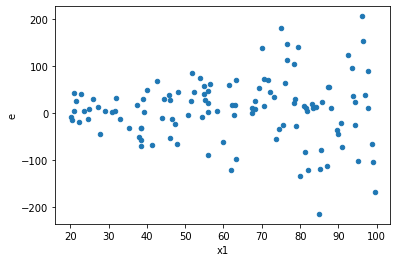

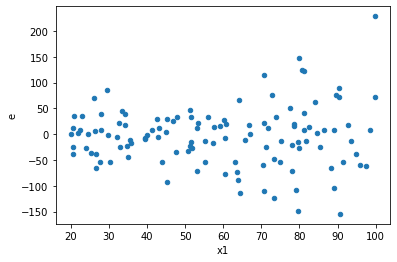

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,55.0,63.0,85728.04735851006,359260.01723496744,1558.6917701547284,5702.539956110594,3.6585424169812057,1.1598149842750871e-06,0.9999994200925079,5.799074921375436e-07,Reject001=0 : Heteroscedasticity
6.0,59.0,59.0,131050.10426540377,225300.50246470154,2221.1882078881995,3818.6525841474836,1.7191936147446405,0.0394158497730237,0.9802920751134881,0.01970792488651185,Reject001=1 : Homoscedasticity
8.0,54.0,64.0,86946.23215246237,463724.0558143433,1610.1154102307846,7245.688372099114,4.500104977605648,2.0645676057640117e-08,0.999999989677162,1.0322838028820058e-08,Reject001=0 : Heteroscedasticity
9.0,58.0,60.0,71898.73750312408,319283.66946756514,1239.6334052262773,5321.394491126086,4.292716272965185,7.765777176871325e-08,0.9999999611711141,3.882888588435662e-08,Reject001=0 : Heteroscedasticity
11.0,61.0,57.0,117313.6164483729,310521.4310251451,1923.1740401372606,5447.744403949914,2.832684037041753,0.00010840111935350727,0.9999457994403232,5.4200559676753635e-05,Reject001=0 : Heteroscedasticity
13.0,52.0,66.0,64138.75070449243,289963.1113218919,1233.4375135479313,4393.38047457412,3.561899509555815,1.6049600910506001e-06,0.9999991975199545,8.024800455253001e-07,Reject001=0 : Heteroscedasticity
15.0,67.0,51.0,82314.60209040619,310324.1521291951,1228.5761506030774,6084.787296650885,4.952714810281816,2.2182911507684366e-08,0.9999999889085442,1.1091455753842183e-08,Reject001=0 : Heteroscedasticity
16.0,69.0,49.0,138235.76562128458,245273.67328341035,2003.4168930620954,5005.585169049191,2.498523989881343,0.0009718404218785892,0.9995140797890607,0.0004859202109392946,Reject001=0 : Heteroscedasticity
25.0,51.0,67.0,72153.19581426517,563307.8785611156,1414.7685453777485,8407.580277031577,5.94272491037516,3.661004832622439e-11,0.999999999981695,1.8305024163112193e-11,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,63.0,85728.04735851006,359260.01723496744,1558.6917701547284,5702.539956110594,3.6585424169812057,1.1598149842750871e-06,Reject001=0 : Heteroscedasticity
1.0,59.0,59.0,466396.15211399883,72965.39719335738,7905.019527355912,1236.7016473450403,0.1564451097262115,2.6043567923384156e-11,Reject001=0 : Heteroscedasticity
2.0,61.0,57.0,304963.5824066456,140378.076637291,4999.402990272878,2462.7732743384386,0.49261347387481064,0.007097670967323979,Reject001=0 : Heteroscedasticity
3.0,55.0,63.0,354637.58938928816,132299.6034791852,6447.95617071433,2099.9937060188126,0.3256836198044701,3.762227000598288e-05,Reject001=0 : Heteroscedasticity
4.0,67.0,51.0,358829.67085272627,128391.5082327542,5355.666729145169,2517.4805535834157,0.47005922528440025,0.0038848263443739405,Reject001=0 : Heteroscedasticity
5.0,50.0,68.0,389375.2083056004,104162.09752722981,7787.504166112008,1531.7955518710266,0.19669916306905702,1.7121559796048583e-08,Reject001=0 : Heteroscedasticity
6.0,59.0,59.0,131050.10426540377,225300.50246470154,2221.1882078881995,3818.6525841474836,1.7191936147446405,0.0394158497730237,Reject001=1 : Homoscedasticity
7.0,59.0,59.0,404096.8389324697,112331.33118808817,6849.098964957114,1903.9208675947148,0.27798121728653347,2.1030720834819235e-06,Reject001=0 : Heteroscedasticity
8.0,54.0,64.0,86946.23215246237,463724.0558143433,1610.1154102307846,7245.688372099114,4.500104977605648,2.0645676057640117e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    982
Reject001=1 : Homoscedasticity       18
Name: Result_test, dtype: int64